# Inputs

### Librerías necesarias

In [1]:
%reset_selective -f b

# Este comando le indica a Python que las figuras se deben generar dentro de la misma Notebook, no en una ventana
## Solo para notebooks.
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import glob
import pyart
import scipy.io as sio
import re


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



### Levanto los datos

In [2]:
dia = '20170203'

#### Levanto los datos de radar

In [3]:
path_user_radar = './febdBZ/'+ dia + '/'
FileList_radar = np.sort(glob.glob(path_user_radar+'*.nc'))
file2read_radar =FileList_radar[0]
print(file2read_radar)

#Creamos el objeto "radar"
radar = pyart.io.read(file2read_radar)


./febdBZ/20170203/cfrad.20170203_000004.000_to_20170203_000423.001_INTA_Ang_v263_SUR.nc




#### Levanto los datos de rayos


In [4]:
path_user_rayos = './rayos/201702/'+ dia




with open(path_user_rayos+'.txt') as f:
    lines = f.readlines()

#### Armo las celdas

Las grillas las genero en el radar, luego correlaciono la información de rayos.

In [5]:
nelev=0

start_index = radar.sweep_start_ray_index['data'][nelev]
end_index   = radar.sweep_end_ray_index['data'][nelev]

rango  = radar.range['data']
tiempo = radar.time['data'][start_index:end_index]

# Sitio radar
lat_radar = radar.latitude['data'][0]
lon_radar = radar.longitude['data'][0]

# Datos de lat/lon
lats = radar.gate_latitude['data'][start_index:end_index]
lons = radar.gate_longitude['data'][start_index:end_index]

# Datos x/y (en metros)
xdist = radar.gate_x['data'][start_index:end_index]/1000.
ydist = radar.gate_y['data'][start_index:end_index]/1000.

# Variables radar
Zh  = radar.fields['dBZ']['data'][start_index:end_index, :]

In [6]:
iTime = file2read_radar.split('_')[1]
fTime = file2read_radar.split('_')[4]

In [7]:
fTime

'000423.001'

Genero la grilla

In [8]:
# mask out last 10 gates of each ray, this removes the "ring" around th radar.
radar.fields['dBZ']['data'][:, -10:] = np.ma.masked

# exclude masked gates from the gridding
gatefilter = pyart.filters.GateFilter(radar)
gatefilter.exclude_transition()
gatefilter.exclude_masked('dBZ')

In [9]:
# perform Cartesian mapping, limit to the reflectivity field.
grid = pyart.map.grid_from_radars(
    (radar,), gatefilters=(gatefilter, ),
    grid_shape=(1, 480, 480),
    grid_limits=((0, 0), (-240000.0, 240000.0), (-240000.0, 240000.0)),
    fields=['dBZ'])

In [13]:
lat_grid=grid.get_point_longitude_latitude(level=0, edges=False)[1]
lon_grid=grid.get_point_longitude_latitude(level=0, edges=False)[0]
extLat = [np.amin(lat_grid),np.amax(lat_grid)]
difLat = 480/(extLat[1]-extLat[0])
extLon = [np.amin(lon_grid),np.amax(lon_grid)]
difLon = 480/(extLon[1]-extLon[0])
print(extLat)
print(extLon)

[-38.698056733120367, -34.352495282538385]
[-66.754157243330312, -61.225976756669681]


In [11]:
if (-34.667>extLat[0]) and(-34.667<extLat[1]):
    print('si')

si


Levanto los datos de rayos

In [35]:
tot = len(lines)

latitude = []
longitude = []
time = []
intensity = []
latBin = []
lonBin = []
for i in range(tot):
    foo=lines[i].split()
    t=(foo[3]+foo[4]+foo[5])
   
    type(foo[7])
    if (t<fTime) and (t>iTime) :
        
        if(float(foo[8])>extLat[0]) and (float(foo[8])<extLat[1]):
            
            
            if(float(foo[7])<extLon[0]) and (float(foo[7])>extLon[1]):
                
                latitude.append(float(foo[8]))
                latBin.append(int((float(foo[8])-extLat[0])*difLat))
                lonBin.append(int((float(foo[7])-extLon[0])*difLon))
                longitude.append(float(foo[7]))
                time.append(t)
                intensity.append(float(foo[9]))
           
    
Rayos = {'Lat': latitude, 'Long': longitude, 'Time': time, 'Int': intensity, 'x':lonBin, 'y':latBin}


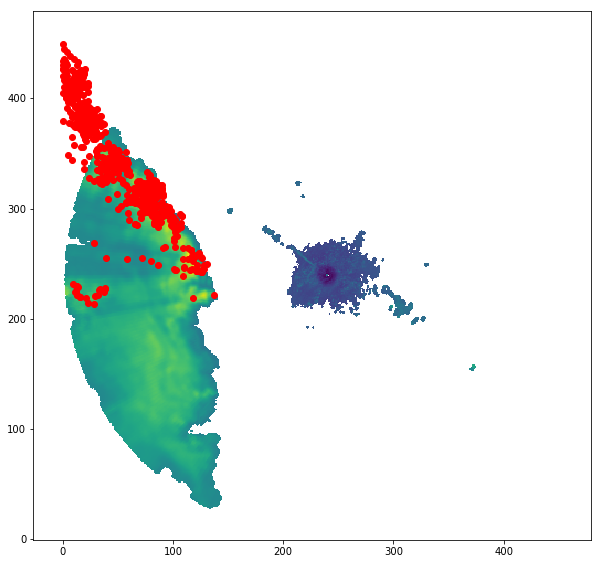

In [53]:

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
ax.imshow(grid.fields['dBZ']['data'][0], origin='lower')
x = Rayos['x']
y = Rayos['y']

plt.scatter(x, y,color='red')
plt.show()



In [67]:
indices=[]
for i in range(480):
    for j in range(480):
        
        
        indices.append(np.where((Rayos['x']==i) & (Rayos['y']==j)))

#### Agrego los datos de rayos a los datos del radar

In [86]:
x=Rayos['x']
np.where(x==57)


(array([], dtype=int64),)

In [89]:
indexes = [l for l,x in enumerate(x) if x == i]

In [90]:
indexes

[]